<a href="https://colab.research.google.com/github/bhuvanrajmp/DetectionOfTB/blob/main/Detection_Of_TB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from skimage.io import imread

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define path to the data directory
data_dir = Path('C/content/drive/MyDrive/deeplearning/TB_Chest_Radiography_Database')

data_dir

PosixPath('C/content/drive/MyDrive/deeplearning/TB_Chest_Radiography_Database')

In [ ]:
# Get the path to the normal and pneumonia sub-directories
normal_cases_dir = Path('/content/drive/MyDrive/deeplearning/TB_Chest_Radiography_Database/Normal')
Tuberculosis_cases_dir = Path('/content/drive/MyDrive/deeplearning/TB_Chest_Radiography_Database/Tuberculosis')

# Get the list of all the images
normal_cases = normal_cases_dir.glob('*.png')
Tuberculosis_cases = Tuberculosis_cases_dir.glob('*.png')

# An empty list. We will insert the data into this list in (img_path, label) format
train_data = []

# Go through all the normal cases. The label for these cases will be 0
for img in normal_cases:
    train_data.append((img,0))

# Go through all the pneumonia cases. The label for these cases will be 1
for img in Tuberculosis_cases:
    train_data.append((img, 1))
# Get a pandas dataframe from the data we have in our list 
train_data = pd.DataFrame(train_data, columns=['image', 'label'],index=None)

# Shuffle the data 
train_data = train_data.sample(frac=1.).reset_index(drop=True)

# How the dataframe looks like?
train_data.head()

,image,label
0,/content/drive/MyDrive/deeplearning/TB_Chest_R...,0
1,/content/drive/MyDrive/deeplearning/TB_Chest_R...,0
2,/content/drive/MyDrive/deeplearning/TB_Chest_R...,0
3,/content/drive/MyDrive/deeplearning/TB_Chest_R...,0
4,/content/drive/MyDrive/deeplearning/TB_Chest_R...,0


In [ ]:
train_data.shape

(4338, 2)

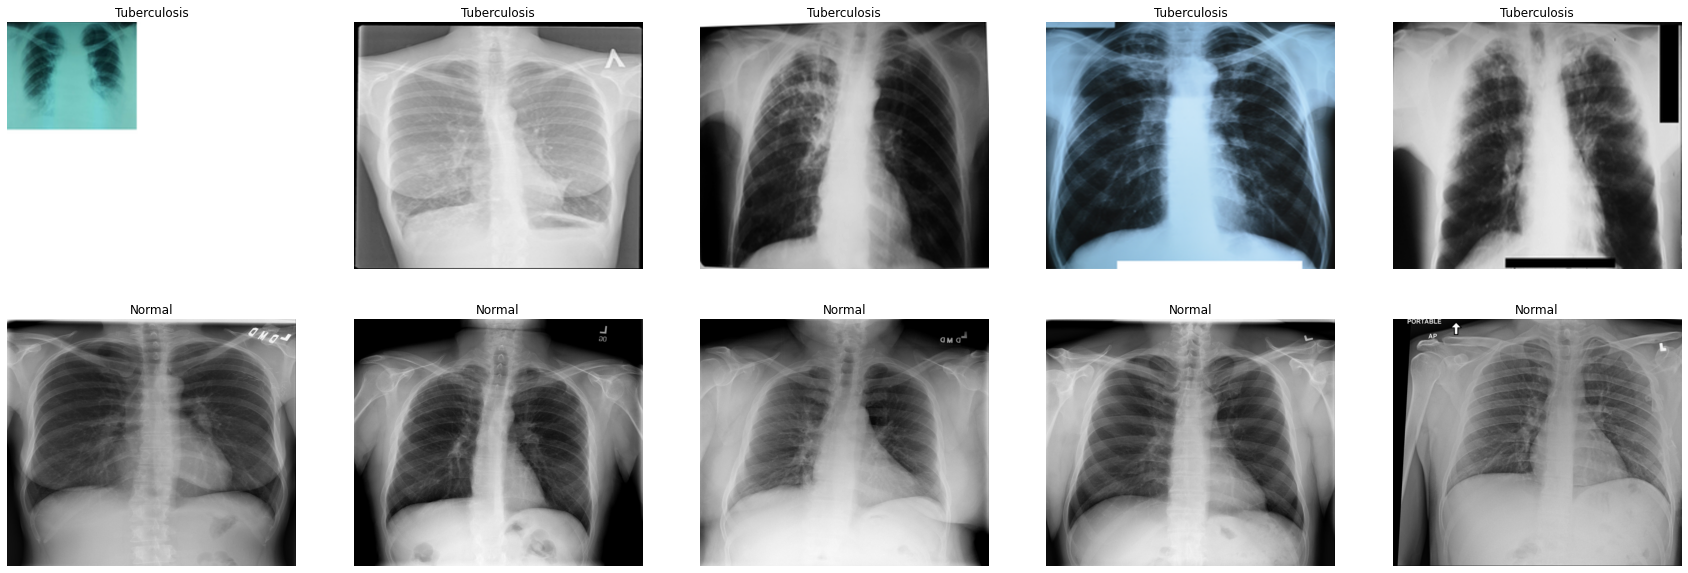

In [ ]:
# Get few samples for both the classes
Tuberculosis_samples = (train_data[train_data['label']==1]['image'].iloc[:5]).tolist()
normal_samples = (train_data[train_data['label']==0]['image'].iloc[:5]).tolist()

# Concat the data in a single list and del the above two list
samples = Tuberculosis_samples + normal_samples
del Tuberculosis_samples, normal_samples

# Plot the data 
f, ax = plt.subplots(2,5, figsize=(30,10))
for i in range(10):
    img = imread(samples[i])
    ax[i//5, i%5].imshow(img, cmap='gray')
    if i<5:
        ax[i//5, i%5].set_title("Tuberculosis")
    else:
        ax[i//5, i%5].set_title("Normal")
    ax[i//5, i%5].axis('off')
    ax[i//5, i%5].set_aspect('auto')
plt.show()

In [ ]:
from tqdm import tqdm
train_normal = data_dir / 'Normal'
train_Tuberculosis = data_dir / 'Tuberculosis'

# Get the list of all the images
normal_cases = normal_cases_dir.glob('*.png')
Tuberculosis_cases =Tuberculosis_cases_dir.glob('*.png')
train_data = []
train_labels = []
from keras.utils.np_utils import to_categorical

for img in tqdm(normal_cases):
    img = cv2.imread(str(img))
    img = cv2.resize(img, (28,28))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=np.array(img)
    img = img/255
    label = 'normal'
    train_data.append(img)
    train_labels.append(label)

    # Tuberculosis cases        
for img in tqdm(Tuberculosis_cases):
    img = cv2.imread(str(img))
    img = cv2.resize(img, (28,28))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=np.array(img)
    img = img/255
    label = 'Tuberculosis'
    train_data.append(img)
    train_labels.append(label)

    # Convert the list into numpy arrays

train_data1 = np.array(train_data)
train_labels1 = np.array(train_labels)

print("Total number of validation examples: ", train_data1.shape)
print("Total number of labels:", train_labels1.shape)

3500it [02:36, 22.36it/s]
838it [01:29,  9.36it/s]

Total number of validation examples:  (4338, 28, 28, 3)
Total number of labels: (4338,)


In [ ]:
train_data1[1]

array([[[0.01568627, 0.01568627, 0.01568627],
        [0.01568627, 0.01568627, 0.01568627],
        [0.01176471, 0.01176471, 0.01176471],
        ...,
        [0.32941176, 0.32941176, 0.32941176],
        [0.12941176, 0.12941176, 0.12941176],
        [0.02745098, 0.02745098, 0.02745098]],

       [[0.09411765, 0.09411765, 0.09411765],
        [0.10980392, 0.10980392, 0.10980392],
        [0.16078431, 0.16078431, 0.16078431],
        ...,
        [0.25882353, 0.25882353, 0.25882353],
        [0.2627451 , 0.2627451 , 0.2627451 ],
        [0.15294118, 0.15294118, 0.15294118]],

       [[0.18823529, 0.18823529, 0.18823529],
        [0.2627451 , 0.2627451 , 0.2627451 ],
        [0.36470588, 0.36470588, 0.36470588],
        ...,
        [0.45098039, 0.45098039, 0.45098039],
        [0.41568627, 0.41568627, 0.41568627],
        [0.46666667, 0.46666667, 0.46666667]],

       ...,

       [[0.36862745, 0.36862745, 0.36862745],
        [0.54117647, 0.54117647, 0.54117647],
        [0.64313725, 0

In [ ]:
train_labels1.shape

(4338,)

In [ ]:
train_data1.shape

(4338, 28, 28, 3)

In [ ]:
train_labels1 = pd.DataFrame(train_labels1, columns=[ 'label'],index=None)
train_labels1.head()

,label
0,normal
1,normal
2,normal
3,normal
4,normal


In [ ]:
train_labels1['label']=train_labels1['label'].map({'normal':0,'Tuberculosis':1})
train_labels1['label'].unique()

array([0, 1])

In [ ]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
train_rows=len(train_data1)
train_data1 = train_data1.reshape(train_rows,-1)
train_data2, train_labels2 = smt.fit_resample(train_data1, train_labels1)

0    3500
1    3500
Name: label, dtype: int64


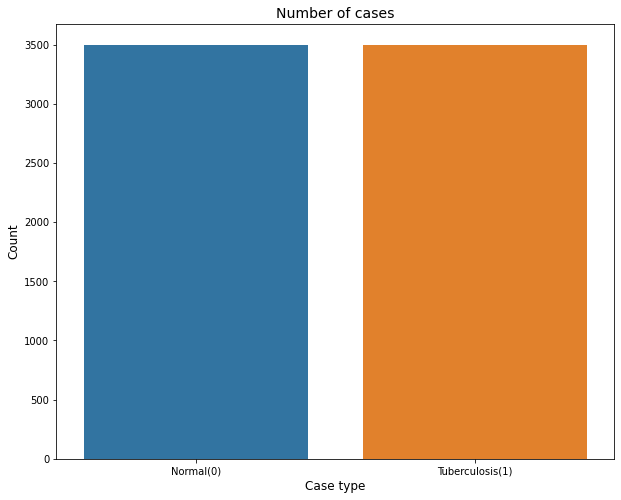

In [ ]:
cases_count1 = train_labels2['label'].value_counts()
print(cases_count1)

# Plot the results 
plt.figure(figsize=(10,8))
sns.barplot(x=cases_count1.index, y= cases_count1.values)
plt.title('Number of cases', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(cases_count.index)), ['Normal(0)', 'Tuberculosis(1)'])
plt.show()

In [ ]:
train_data2.shape

(7000, 2352)

In [ ]:
train_labels2.shape

(7000, 1)

In [ ]:
train_labels2

,label
0,0
1,0
2,0
3,0
4,0
...,...
6995,1
6996,1
6997,1
6998,1


In [ ]:
train_data2 =train_data2.reshape(-1,28,28,3)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_data2, train_labels2, test_size=0.13, random_state=42)

In [ ]:
X_train.shape

(6090, 28, 28, 3)

In [ ]:
y_test.shape

(910, 1)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(28,
                                  28,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
      
  ]
)

In [ ]:
import tensorflow as tf
from tensorflow.keras import  layers, models

model = models.Sequential([
    data_augmentation,
    layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 3)) ,
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu')
    
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 28, 28, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 28)        784       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        16192     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)         

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(640, activation='tanh'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(564, activation='tanh'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='tanh'))
model.add(layers.Dense(64, activation='sigmoid'))
model.add(layers.Dense(2))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 28, 28, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 28)        784       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        16192     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)         

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history=model.fit(np.array(X_train), np.array(y_train), epochs=200, validation_data=(np.array(X_test), np.array(y_test)))
#model.fit(np.array(train_data1), np.array(train_labels1), epochs=10)

Epoch 1/200
191/191 [==============================] - 13s 61ms/step - loss: 0.2885 - accuracy: 0.8887 - val_loss: 0.2417 - val_accuracy: 0.9033
Epoch 2/200
191/191 [==============================] - 10s 52ms/step - loss: 0.2536 - accuracy: 0.8982 - val_loss: 0.2786 - val_accuracy: 0.8879
Epoch 3/200
191/191 [==============================] - 10s 51ms/step - loss: 0.2292 - accuracy: 0.9118 - val_loss: 0.1956 - val_accuracy: 0.9231
Epoch 4/200
191/191 [==============================] - 10s 53ms/step - loss: 0.1856 - accuracy: 0.9299 - val_loss: 0.2162 - val_accuracy: 0.9209
Epoch 5/200
191/191 [==============================] - 10s 53ms/step - loss: 0.1931 - accuracy: 0.9251 - val_loss: 0.1615 - val_accuracy: 0.9352
Epoch 6/200
191/191 [==============================] - 10s 53ms/step - loss: 0.1424 - accuracy: 0.9452 - val_loss: 0.1480 - val_accuracy: 0.9473
Epoch 7/200
191/191 [==============================] - 10s 55ms/step - loss: 0.1746 - accuracy: 0.9350 - val_loss: 0.1448 - val_ac

In [ ]:
print(np.average(history.history['accuracy']))

0.978468801677227


In [ ]:
print(np.average(history.history['loss']))

0.06002176349051297


In [ ]:
test_data = []
image='../input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/Tuberculosis/Tuberculosis-101.png'
img = cv2.imread(str(image))  


img=np.array(img)

test_data.append(img)
    
# Convert the list into numpy arrays

test_data1 = np.array(test_data)

In [ ]:
model.save('my_model1')

In [ ]:
new_model = tf.keras.models.load_model('./my_model1')

# Check its architecture
new_model.summary()

In [ ]:
test_data = []
image='/content/drive/MyDrive/deeplearning/TB_Chest_Radiography_Database/Normal/Normal-1004.png'
img = cv2.imread(str(image))
img = cv2.resize(img, (28,28))
if img.shape[2] ==1:
    img = np.dstack([img, img, img])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img=np.array(img)
img = img/255
test_data.append(img)
    
# Convert the list into numpy arrays

test_data1 = np.array(test_data)

In [ ]:
a=model.predict(np.array(test_data1))


In [ ]:
np.argmax(a)

In [ ]:
test_data = []
image='/content/drive/MyDrive/deeplearning/TB_Chest_Radiography_Database/Normal/Normal-1004.png'
img = cv2.imread(str(image))
img = cv2.resize(img, (28,28))
if img.shape[2] ==1:
    img = np.dstack([img, img, img])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img=np.array(img)
img = img/255
test_data.append(img)
    
# Convert the list into numpy arrays

test_data1 = np.array(test_data)

a=model.predict(np.array(test_data1))

np.argmax(a)

if (np.argmax(a) == 0):
  print('The person is normal')
else:
  print('The person has Tuberculosis')

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['loss'])
sns.lineplot(x = history.epoch, y = history.history['val_loss'])
ax.set_title('Learning Curve (Loss)')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.set_ylim(0, 0.5)
ax.legend(['train', 'val'], loc='best')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['accuracy'])
sns.lineplot(x = history.epoch, y = history.history['val_accuracy'])
ax.set_title('Learning Curve (Accuracy)')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylim(0.80, 1.0)
ax.legend(['train', 'val'], loc='best')
plt.show()

In [ ]:
tf.keras.models.save_model(model,'my_model.hdf5')

In [ ]:
model = tf.keras.models.load_model('/content/my_model.hdf5')

In [ ]:
!pip install path.py

In [ ]:
import os
import PIL

In [ ]:
!pip install streamlit

In [ ]:
import sys

In [ ]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
import streamlit as st


@st.cache(allow_output_mutation=True)
def load_model():
  model=tf.keras.models.load_model('/content/my_model.hdf5')
  return model
with st.spinner('Model is being loaded..'):
  model=load_model()

st.write("""
         # Detection of TB
         """
         )

def load_image(file):
  temp=Image.open(file)
  return temp
file = st.file_uploader("Please upload an chest X-ray file", type=["jpg", "png"])
import cv2
from PIL import Image, ImageOps
import numpy as np
st.set_option('deprecation.showfileUploaderEncoding', False)
def import_and_predict(image, model):
    test_data = []
    image='/content/drive/MyDrive/deeplearning/TB_Chest_Radiography_Database/Normal/'+file.name
    img = cv2.imread(str(image))
    if img is None:
        image='/content/drive/MyDrive/deeplearning/TB_Chest_Radiography_Database/Tuberculosis/'+file.name
        img = cv2.imread(str(image))
    img = cv2.resize(img, (28,28))
    if img.shape[2] ==1:
      img = np.dstack([img, img, img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=np.array(img)
    img = img/255
    test_data.append(img)

    test_data1 = np.array(test_data)

    a=model.predict(np.array(test_data1))

    value=np.argmax(a)
    if (np.argmax(a) == 0):
        st.text('The person does not have Tuberculosis')
    else:
        st.text('The person has Tuberculosis')
    return value 

if file is None:
    st.text("Please upload an image file")
else:
    image = Image.open(file)
    st.image(image, width=240)
    predictions = import_and_predict(image, model) 

     

In [ ]:
!streamlit run app.py & npx localtunnel --port 8501 